<a href="https://colab.research.google.com/github/TheNeuvillette/Data-Science-Fundamentals-DCBP/blob/main/Coding%20Task%202/TheNeuvillette_CodingTask2_Tested.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals - DCBP, solved by TheNeuvilette

Disclaimer: CT-2.3 was done with the help of GitHub user "Orsli". The code originally stems from them, but was adapted.

CT-2.4 was tried, yet the code didn't properly function.

#Task summary (maximum 12.5 points)

- **CT-2.1** Upload the 15 images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points]
- **CT-2.2** With some filtering and thresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]
- **CT-2.3** Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points]
- **CT-2.4** Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

**Pre-CT:** Preinstall libraries not included in google colab

In [1]:
!pip install heic2png

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.5/812.5 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


**Pre-CT:** Activating all libraries needed during the coding task.

In [1]:
import os
from heic2png import HEIC2PNG

import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf
import skimage.morphology as skm

import matplotlib
from PIL import Image, ImageDraw, ImageFont

**Pre-CT:** Installing Google Colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Pre-CT:** Set path variable.

In [3]:
folder_path = '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/'

**CT-2.1** Upload the 15 images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points]

In [10]:
# Get a list of all files in the specified folder
file_list = os.listdir(folder_path)
file_list

['IMG_5382.HEIC',
 'IMG_5381.HEIC',
 'IMG_5384.HEIC',
 'IMG_5385.HEIC',
 'IMG_5386.HEIC',
 'IMG_5387.HEIC',
 'IMG_5391.HEIC',
 'IMG_5390.HEIC',
 'IMG_5379.HEIC',
 'IMG_5388.HEIC',
 'IMG_5389.HEIC',
 'IMG_5392.HEIC',
 'IMG_5393.HEIC',
 'IMG_5383.HEIC',
 'IMG_5380.HEIC']

In [11]:
# Create a new folder to save the PNG images
png_folder = os.path.join(folder_path, "png_images")
os.makedirs(png_folder, exist_ok=True)

In [12]:
# Funtion coverting all HEIC images into PNG images.

def convert_images_to_png(folder_path):
    for filename in file_list:
        image_path = os.path.join(folder_path, filename)
        heic_img = HEIC2PNG(image_path)
        png_filename = os.path.splitext(filename)[0] + ".png"
        png_path = os.path.join(png_folder, png_filename)
        heic_img.save(png_path)

    return

# Converting and saving all images from HEIC to PNG:
png_folder_path = convert_images_to_png(folder_path)
print("PNG images saved!")

PNG images saved!


**CT-2.2** With some filtering and thresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]

In [13]:
#Set path to the image.
url_pre  = '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/png_images/'
url_name = 'IMG_5387.png'

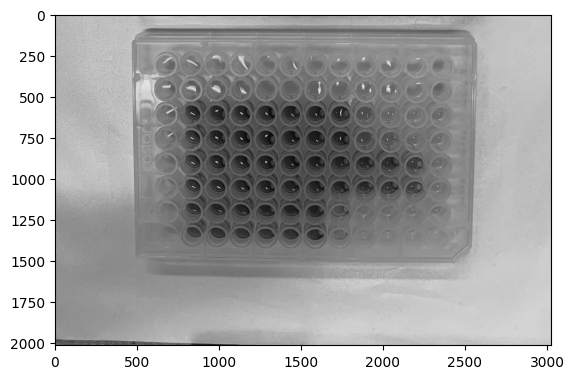

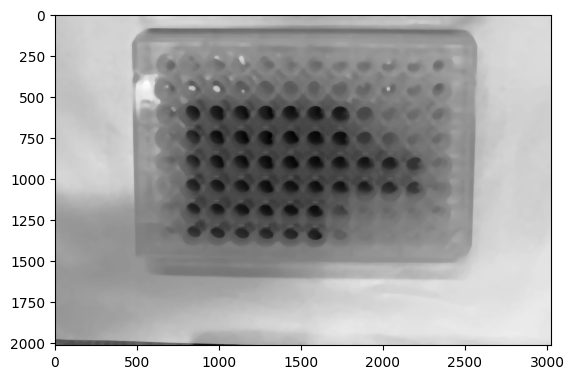

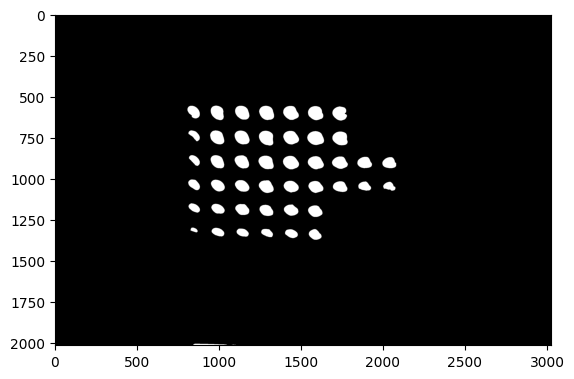

In [14]:
#Load image and show the B channel only.
imageRGB  = io.imread(url_pre+url_name)
image = imageRGB[:,:,2]
# Cropping to only include lower part.
image = image[image.shape[0]//2:image.shape[0],:]
plt.imshow(image, cmap ='gray')
plt.show()
# Filtering to get rid of white specs.
image_mean = skf.median(image,footprint=skm.disk(20))
plt.imshow(image_mean, cmap ='gray')
plt.show()
# Thresholding.
threshold_manual = 60
image_threshold = image_mean < threshold_manual
plt.imshow(image_threshold, cmap ='gray')
plt.show()

**CT-2.3** Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points]

In [15]:
# Making a directory for thresholded images and saving them.
matplotlib.image.imsave('image-bw.png', image_threshold)

Counted bins: 44 - Calculated bins: 37


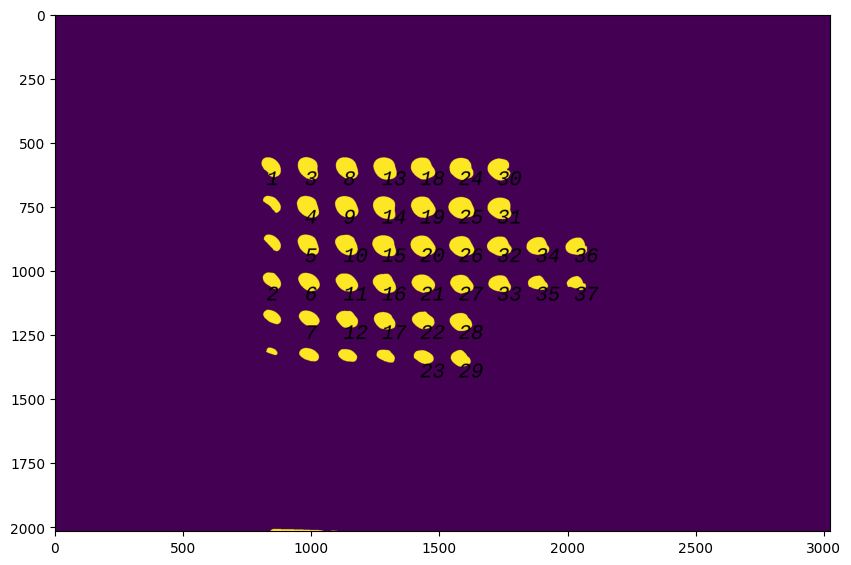

In [16]:
# Function counting the bins.
def count_bins(image_path, window_size, threshold):
    image = Image.open(image_path)
    pixels = image.load()
    size = image.size
    bin_count = 0
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype('LiberationMono-Italic.ttf', 80)

    for x in range(0, size[0], window_size):
        for y in range(0, size[1], window_size):
            if pixels[x, y][1] > threshold:
                bin_count += 1
                draw.text((x, y), str(bin_count), (0, 0, 0), font=font)
    plt.figure(figsize=(10,10))
    plt.imshow(image)

    return bin_count

# Counting the bins:
image_path = 'image-bw.png'
window_size = 75
threshold = 100
result = count_bins(image_path, window_size, threshold)
print(f"Counted bins: 44 - Calculated bins: {result}")


**CT-2.4** Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

In [23]:
# Get a list of all files in the specified folder
folder_path = '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/png_images/'
file_list = os.listdir(folder_path)
file_list

['IMG_5382.png',
 'IMG_5381.png',
 'IMG_5384.png',
 'IMG_5385.png',
 'IMG_5386.png',
 'IMG_5387.png',
 'IMG_5391.png',
 'IMG_5390.png',
 'IMG_5379.png',
 'IMG_5388.png',
 'IMG_5389.png',
 'IMG_5392.png',
 'IMG_5393.png',
 'IMG_5383.png',
 'IMG_5380.png']

In [24]:
# Did not fully work out.

# Function counting the bins.

window_size = 75
threshold = 100

def count_bins(image_path, window_size, threshold):
    image = Image.open(image_path)
    pixels = image.load()
    size = image.size
    bin_count = 0

    for x in range(0, size[0], window_size):
        for y in range(0, size[1], window_size):
            if pixels[x, y][1] > threshold:
                bin_count += 1

    return bin_count


for filename in file_list:
    imageRGB  = io.imread(png_folder+filename)
    image = imageRGB[:,:,2]
    image = image[image.shape[0]//2:image.shape[0],:]
    threshold_manual = 60
    image_threshold = image_mean < threshold_manual
    matplotlib.image.imsave(filename, image_threshold)
    result = count_bins(filename, window_size, threshold)
    print(f"Counted bins: 44 - Calculated bins: {result}")

FileNotFoundError: No such file: '/content/drive/MyDrive/Courses/DSF-DCBP/Data-Images/png_imagesIMG_5382.png'